In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from numpy.polynomial.polynomial import polydiv, polyder, polymul, polyadd, polyval

# Lab 1
**Михайло Корешков, ФІ-91**  
(*Варіант 6*)

$P(x) = 2 - x -4x^2 + 2x^3$

In [2]:
P = np.array([2.0,-1.0,-4.0,2.0])
n = 3

## 1. Передпрограмний етап

### 1.1. Верхня межа додатніх коренів

In [3]:
B = -np.inf
m = -np.inf
for i,v in enumerate(P):
    if np.abs(v) > B and v < 0:
        B, B_i = np.abs(v), i
    if i > m and v < 0:
        m = i
max_bound = 1 + np.power(B / P[n], 1/(n-m))
print(f"(max a_i : a_i < 0) = {m}")
print(f"(max |a_i| : a_i < 0) = {B}")
print("Верхня межа коренів: ", max_bound) 

(max a_i : a_i < 0) = 2
(max |a_i| : a_i < 0) = 4.0
Верхня межа коренів:  3.0


### 1.2. Нижня межа додатніх коренів

In [4]:
m = +np.inf
for i,v in enumerate(P):
    if v < 0:
        m = i
        break
m = n-m
min_positive_bound = 1/(1 + np.power(B / P[0], 1/(n-m)))
print("P: ", np.flip(P))
print(f"(max a_i : a_i < 0) = {m}")
print(f"(max |a_i| : a_i < 0) = {B}")
print("Нижня межа додатніх коренів: ", min_positive_bound)

P:  [ 2. -4. -1.  2.]
(max a_i : a_i < 0) = 2
(max |a_i| : a_i < 0) = 4.0
Нижня межа додатніх коренів:  0.3333333333333333


### 1.3. Нижня межа від'ємних коренів

In [5]:
P_neg = P * (2 * (np.arange(1,n+2) % 2) - 1)
print("Поліном після заміни x на -x: ", P_neg)
B = -np.inf
for i,v in enumerate(P_neg):
    if np.abs(v) > B and v < 0:
        B, m = np.abs(v), i
min_bound = 1 + np.power(B / P_neg[n], 1/(n-m))
print(f"(max a_i : a_i < 0) = {m}")
print(f"(max |a_i| : a_i < 0) = {B}")
print("Нижня межа коренів: ", min_bound) 

Поліном після заміни x на -x:  [ 2.  1. -4. -2.]
(max a_i : a_i < 0) = 2
(max |a_i| : a_i < 0) = 4.0
Нижня межа коренів:  -1.0


## 1.4. Верхня межа від'ємних коренів

In [6]:
m = +np.inf
for i,v in enumerate(P_neg):
    if v < 0:
        m = i
        break
m = n-m
max_negative_bound = -1/(1 + np.power(B / P[0], 1/(n-m)))
print("P: ", np.flip(P_neg))
print(f"(max a_i : a_i < 0) = {m}")
print(f"(max |a_i| : a_i < 0) = {B}")
print("Верхня межа додатніх коренів: ", max_negative_bound)

P:  [-2. -4.  1.  2.]
(max a_i : a_i < 0) = 1
(max |a_i| : a_i < 0) = 4.0
Верхня межа додатніх коренів:  -0.4142135623730951


## 1.5. Метод Штурма

In [7]:
P0 = P; P0

array([ 2., -1., -4.,  2.])

In [8]:
P1 = polyder(P); P1

array([-1., -8.,  6.])

In [9]:
# polydiv(f, g) = q, r
P2 = -polydiv(P0,P1)[1]; P2

array([-1.77777778,  2.44444444])

In [10]:
P3 = -polydiv(P1,P2)[1]; P3

array([3.6446281])

In [11]:
P4 = -polydiv(P2,P3)[1]; P4

array([0.])

In [12]:
def sturm(x):
    return polyval(x, P0),  polyval(x, P1), polyval(x, P2), polyval(x, P3)

In [13]:
sturm(min_bound) # (1)

(-3.0, 13.0, -4.222222222222222, 3.644628099173554)

In [14]:
sturm(max_bound) # (2)

(17.0, 29.0, 5.555555555555556, 3.644628099173554)

Маємо 3 зміни знаку в (1) та 0 змін знаку в (2).  
Отже, між нижньою та верхньою межами коренів - **3 дійсних кореня**.  

Степінь полінома - також 3, отже маємо **0 комплексних коренів**

In [15]:
sturm(0) # (3)

(2.0, -1.0, -1.7777777777777777, 3.644628099173554)

2 зміни знаку.  
Отже **між нижньою межею та 0 маємо 1 корінь**

In [16]:
sturm(1) # (4)

(-1.0, -3.0, 0.666666666666667, 3.644628099173554)

1 зміна знаку  
Отже **між 0 та 1 маємо 1 корінь**

In [17]:
init_borders = [min_bound, 0, 1, max_bound]; 
print("Початкові межі між коренями: ", init_borders)

Початкові межі між коренями:  [-1.0, 0, 1, 3.0]


### 1.6. Графік

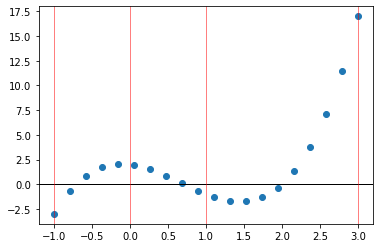

In [18]:
X = np.linspace(min_bound, max_bound, 20)
plt.scatter(X, polyval(X, P))
plt.gca().axhline(0, c='k', lw=1)
for b in init_borders:
    plt.gca().axvline(b, c='r', lw=0.5)

## 1.7. Метод Лагранжа

$$P(x) = 2 - x -4x^2 + 2x^3$$
$$F(x) = 2x^3 - 4x^2 - x$$
$$\Phi(x) = 2$$


Text(0.5, 1.0, 'Метод Лагранжа (додатні корені), $F(x)$')

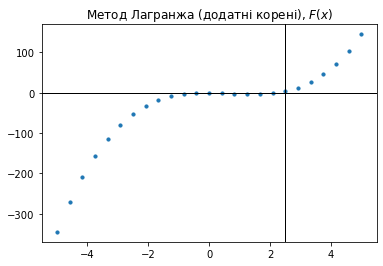

In [19]:
def F(x):
    return 2*x**3 - 4*x**2 - x

X1 = np.linspace(-5, 5, 25) 
plt.scatter(X1, F(X1), s=10)
plt.gca().axhline(0, c='k', lw=1)
plt.gca().axvline(2.5, c='k', lw=1)
plt.gca().set_title("Метод Лагранжа (додатні корені), $F(x)$") 

Бачимо, що $F(x)$ більше нуля після $2.5$. Можемо взяти це число як верхню границю додатніх коренів

**від'ємні корені**  
$$P(x) = -2 + x +4x^2 - 2x^3$$
$$F(x) = -2x^3 -2$$

Text(0.5, 1.0, "Метод Лагранжа (від'ємні корені), $F_{neg}(x)$")

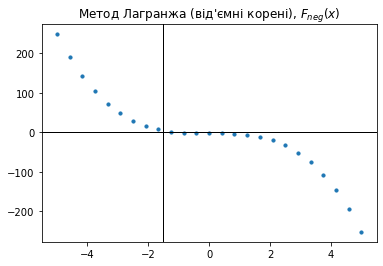

In [20]:
def F_neg(x):
    return -2*x**3 - 2

plt.scatter(X1, F_neg(X1), s=10)
plt.gca().axhline(0, c='k', lw=1)
plt.gca().axvline(-1.5, c='k', lw=1)
plt.gca().set_title("Метод Лагранжа (від'ємні корені), $F_{neg}(x)$") 

Бачимо, що  $F(x)$  більше нуля до $-1.5$ . Можемо взяти це число як нижню границю від'ємних коренів

# 2. Уточнення коренів

In [21]:
def log(*args, **kwargs):
    if LOG:
        print(*args, **kwargs)

LOG = True

In [22]:
def f(x):
    return polyval(x,P)

def df(x):
    return polyval(x, P1)

In [23]:
EPS = 10e-8

In [24]:
Results = dict()

## 2.1. Метод Бісекції
**Вхід:** 
- Кінці інтервалу з гарантовано одним коренем  
    (Функція має в цьому корені змінювати знак)
- Точність $\varepsilon$

**Вихід**:
- Наближений корінь $x^*$ з точністю $|x^* - x_{true}| < \varepsilon$

In [25]:
def bisect(f, a, b, eps, timeout=1000):
    a = float(a)
    b = float(b)
    n = 1
    log("Bisection method.")
    while np.abs(a-b) > eps and n < timeout:
        c = (a+b)/2
        fc = f(c)
        log(f"it {n}: a={a}, b={b}, c={c}, f(c)={fc} ", end='')
        sfc = np.sign(fc)
        if np.sign(f(a)) * sfc < 0:
            log("-> [a,c]")
            a, b = a, c
        elif sfc * np.sign(f(b)) < 0:
            log("-> [c,b]")
            a, b = c, b
        elif -eps < fc < eps:
            log("-> (|f(c)| < eps) -> root found!")
            return c
        else:
            log("; Something wrong. Let's shift boundaries a bit.")
            a = a+eps
            b = b+eps
        n += 1
        
    log("Finished. ", end='')
    if np.abs(a-b) < eps:
        log("|a-b|<eps")
    else:
        log("timeout")
    return (a+b)/2

In [26]:
roots = []
for i in range(len(init_borders)-1):
    roots.append(bisect(f, init_borders[i], init_borders[i+1], EPS))

print("\nКорені, уточнені методом Бісекції: ", roots)
Results['bisection'] = roots

Bisection method.
it 1: a=-1.0, b=0.0, c=-0.5, f(c)=1.25 -> [a,c]
it 2: a=-1.0, b=-0.5, c=-0.75, f(c)=-0.34375 -> [c,b]
it 3: a=-0.75, b=-0.5, c=-0.625, f(c)=0.57421875 -> [a,c]
it 4: a=-0.75, b=-0.625, c=-0.6875, f(c)=0.14697265625 -> [a,c]
it 5: a=-0.75, b=-0.6875, c=-0.71875, f(c)=-0.09027099609375 -> [c,b]
it 6: a=-0.71875, b=-0.6875, c=-0.703125, f(c)=0.03035736083984375 -> [a,c]
it 7: a=-0.71875, b=-0.703125, c=-0.7109375, f(c)=-0.02945232391357422 -> [c,b]
it 8: a=-0.7109375, b=-0.703125, c=-0.70703125, f(c)=0.0005782842636108398 -> [a,c]
it 9: a=-0.7109375, b=-0.70703125, c=-0.708984375, f(c)=-0.01440553367137909 -> [c,b]
it 10: a=-0.708984375, b=-0.70703125, c=-0.7080078125, f(c)=-0.006905758753418922 -> [c,b]
it 11: a=-0.7080078125, b=-0.70703125, c=-0.70751953125, f(c)=-0.0031617714557796717 -> [c,b]
it 12: a=-0.70751953125, b=-0.70703125, c=-0.707275390625, f(c)=-0.0012912522361148149 -> [c,b]
it 13: a=-0.707275390625, b=-0.70703125, c=-0.7071533203125, f(c)=-0.000356361157

## 2.2. Метод Хорд
**Вхід:** 
- Кінці інтервалу з гарантовано одним коренем  
    (Функція має в цьому корені змінювати знак)
- Точність $\varepsilon$

*Рекомендовано:*
- Монотонність
- Знакосталість другої похідної

**Вихід**:
- Наближений корінь $x^*$ з точністю $|x^* - x_{true}| < \varepsilon$

In [27]:
def chord(f, a, b, eps, timeout=1000):
    a = float(a)
    b = float(b)
    log("Chord method.")
    
    def gen_c(a,b):
        fa, fb = f(a), f(b)
        c = (a*f(b) - b*f(a))/(f(b) - f(a))
        return c, fa, f(c), fb
    
    n = 1
    c_prev = np.inf
    c, fa, fc, fb = gen_c(a,b)
    while np.abs(fc) > eps and np.abs(c-c_prev) > eps and n < timeout:
        log(f"it {n}: a={a}, b={b}, c={c}, f(c)={fc} ", end='')
        if np.sign(fa) * np.sign(fc) < 0:
            a, b, c_prev = a, c, c
            log("-> [a,c]")
        elif np.sign(fc) * np.sign(fb) < 0:
            a, b, c_prev = c, b, c
            log("-> [c,b]")
        c, fa, fc, fb = gen_c(a,b)
        n += 1
    log("Chord method finished. ", end='')
    if np.abs(fc) < eps:
        log("(|f(c)| < eps) - root found")
    elif np.abs(c-c_prev) < eps:
        log("|c-c_prev| < eps")
    else:
        log("timeout")
    
    return c

In [28]:
roots = []
for i in range(len(init_borders)-1):
    roots.append(chord(f, init_borders[i], init_borders[i+1], EPS))

print("\nКорені, уточнені методом Хорд: ", roots)
Results['chord'] = roots

Chord method.
it 1: a=-1.0, b=0.0, c=-0.4, f(c)=1.6320000000000001 -> [a,c]
it 2: a=-1.0, b=-0.4, c=-0.61139896373057, f(c)=0.6590716974423763 -> [a,c]
it 3: a=-1.0, b=-0.61139896373057, c=-0.6813937508731615, f(c)=0.1914652225505351 -> [a,c]
it 4: a=-1.0, b=-0.6813937508731615, c=-0.7005078605817768, f(c)=0.05016861598798705 -> [a,c]
it 5: a=-1.0, b=-0.7005078605817768, c=-0.7054338525597733, f(c)=0.012786311431398634 -> [a,c]
it 6: a=-1.0, b=-0.7054338525597733, c=-0.7066839958188645, f(c)=0.003235732739164998 -> [a,c]
it 7: a=-1.0, b=-0.7066839958188645, c=-0.7070000190291985, f(c)=0.0008173683296937018 -> [a,c]
it 8: a=-1.0, b=-0.7070000190291985, c=-0.7070798269200664, f(c)=0.00020637890134067582 -> [a,c]
it 9: a=-1.0, b=-0.7070798269200664, c=-0.7070999763817586, f(c)=5.2103016787485856e-05 -> [a,c]
it 10: a=-1.0, b=-0.7070999763817586, c=-0.7071050632850268, f(c)=1.3153697233869721e-05 -> [a,c]
it 11: a=-1.0, b=-0.7071050632850268, c=-0.7071063474965023, f(c)=3.320699915709824e-

Тут видно, що на третьому інтервалі методу Хорд працювати складно. 

Спробуємо трохи зменшити інтервал, щоб функція на ньому була монотонною

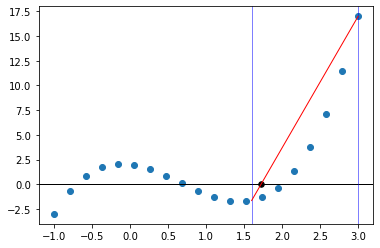

In [29]:
a, b = 1.6, 3
plt.scatter(X, polyval(X, P))
plt.gca().axhline(0, c='k', lw=1)
plt.gca().axvline(a, c='b', lw=0.5)
plt.gca().axvline(b, c='b', lw=0.5)

fa, fb = polyval(a,P), polyval(b,P)
c = (a*fb - b*fa)/(fb - fa)
plt.plot([a,b], [polyval(a,P), polyval(b,P)], c='r', lw='1')
plt.scatter([c], [0], c='k', s=30)

In [30]:
root = chord(f, a, b, EPS)
root

Chord method.
it 1: a=1.6, b=3.0, c=1.723723723723724, f(c)=-1.365480839441286 -> [c,b]
it 2: a=1.723723723723724, b=3.0, c=1.8186153748775602, f(c)=-1.0184245650052546 -> [c,b]
it 3: a=1.8186153748775602, b=3.0, c=1.885388755569285, f(c)=-0.7002038186237356 -> [c,b]
it 4: a=1.885388755569285, b=3.0, c=1.9294817534595223, f(c)=-0.45454649055224605 -> [c,b]
it 5: a=1.9294817534595223, b=3.0, c=1.9573598946819541, f(c)=-0.28409036322645553 -> [c,b]
it 6: a=1.9573598946819541, b=3.0, c=1.9744972736246427, f(c)=-0.17334914559498138 -> [c,b]
it 7: a=1.9744972736246427, b=3.0, c=1.984848779316128, f(c)=-0.10422902509434495 -> [c,b]
it 8: a=1.984848779316128, b=3.0, c=1.9910348647514893, f(c)=-0.06211439866066781 -> [c,b]
it 9: a=1.9910348647514893, b=3.0, c=1.9947079887958608, f(c)=-0.03682033177789368 -> [c,b]
it 10: a=1.9947079887958608, b=3.0, c=1.9968806468779068, f(c)=-0.021757689648332246 -> [c,b]
it 11: a=1.9968806468779068, b=3.0, c=1.9981628622615, f(c)=-0.01283297596989419 -> [c,b]

1.9999998691378926

Ітерацій трохи менше, ніж було, але все ще більше, ніж в інших випадках. 

## 2.3. Метод Ньютона!

**Вхід:** 
- Початкове наближення $x_0$  
    (Часто беруть один з кінців інтервалу, що містить гарантовано один корінь)
- Точність $\varepsilon$
- Похідна $f'$

*Рекомендовано:*
- Монотонність
- Знакосталість другої похідної
- Відслідковувати щоб дотична, проведена у відповідній точці, не перетнула вісь абцис *поза* заданим інтервалом

**Вихід**:
- Наближений корінь $x^*$ з точністю $|x^* - x_{true}| < \varepsilon$

In [31]:
def newton(f, df, a, b, x0, eps, timeout=1000):
    a, b = float(a), float(b)
    
    x_old = fx = np.inf
    x = float(x0)
    n = 1
    log("Newton method.")
    while np.abs(x-x_old) > eps and np.abs(fx) > eps and n < timeout:
        x_old, fx = x, f(x)
        x = x_old - f(x_old) / df(x_old)
        log(f"it {n}: x_old={x_old}, x={x}, f(x)={fx}")
        if x > b or x < a:
            log(ValueError(f"x out of [{a},{b}]! Terminating."))
            return np.nan
        n += 1
    log("Finished. ", end='')
    if np.abs(x-x_old) < eps:
        log("|x-x_old| < eps")
    elif np.abs(fx) < eps:
        log("|f(x)| < eps")
    else:
        log("timeout :(")
    
    return x
        
        

In [32]:
roots = []
for i in range(len(init_borders)-1):
    r = newton(f, df, init_borders[i], init_borders[i+1], init_borders[i], EPS)
    if r != r:
        # r is nan. try other bound.
        log("Trying x0=b instead of a")
        r = newton(f, df, init_borders[i], init_borders[i+1], init_borders[i+1], EPS)
    roots.append(r)

print("\nКорені, уточнені методом Ньютона: ", roots)
Results['newton'] = roots

Newton method.
it 1: x_old=-1.0, x=-0.7692307692307692, f(x)=-3.0
it 2: x_old=-0.7692307692307692, x=-0.7108717251477279, f(x)=-0.5079654073736908
it 3: x_old=-0.7108717251477279, x=-0.7071219452226626, f(x)=-0.02894457171113629
it 4: x_old=-0.7071219452226626, x=-0.7071067814340813, f(x)=-0.00011611070975270366
it 5: x_old=-0.7071067814340813, x=-0.7071067811865475, f(x)=-1.8953305591651315e-09
Finished. |x-x_old| < eps
Newton method.
it 1: x_old=0.0, x=2.0, f(x)=2.0
x out of [0.0,1.0]! Terminating.
Trying x0=b instead of a
Newton method.
it 1: x_old=1.0, x=0.6666666666666667, f(x)=-1.0
it 2: x_old=0.6666666666666667, x=0.7070707070707071, f(x)=0.14814814814814792
it 3: x_old=0.7070707070707071, x=0.7071067811002524, f(x)=0.000131918099472772
it 4: x_old=0.7071067811002524, x=0.7071067811865476, f(x)=3.155689043410348e-10
Finished. |x-x_old| < eps
Newton method.
it 1: x_old=1.0, x=0.6666666666666667, f(x)=-1.0
x out of [1.0,3.0]! Terminating.
Trying x0=b instead of a
Newton method.
it

In [33]:
# a, b = 1, 3
# plt.scatter(X, polyval(X, P))
# plt.gca().axhline(0, c='k', lw=1)
# plt.gca().axvline(a, c='b', lw=0.5)
# plt.gca().axvline(b, c='b', lw=0.5)

# fb, fpb = polyval(b,P), polyval(b,P1)
# c = b - fb / fpb

# plt.plot([1,2], [(polyval(2,P1))*(1-2)-fb,polyval(2,P)], c='r', lw='1')
# plt.gca().axvline(b, c='b', lw=0.5)
# plt.scatter([c], [0], c='k', s=30)

# 3. Аналіз результатів

## 3.1. Точність
Можна знайти корені аналітично:
$x_1 = -\frac{\sqrt{2}}{2}; \; x_2 = \frac{\sqrt{2}}{2};\; x_3 = 2 $

In [34]:
true_roots = np.array([-np.sqrt(2)/2, np.sqrt(2)/2, 2.0])

np_results = np.array(list(Results.values()))
Deltas = np_results - true_roots
print("Існинні корені:\n", true_roots)
print("Результати: \n", np_results)
print("Відхилення: \n", Deltas)
print("Відносні відхилення: \n", Deltas / np.abs(true_roots))

Існинні корені:
 [-0.70710678  0.70710678  2.        ]
Результати: 
 [[-0.7071068   0.7071068   2.        ]
 [-0.70710675  0.70710679  1.99999991]
 [-0.70710678  0.70710678  2.        ]]
Відхилення: 
 [[-1.77007052e-08  1.77007052e-08  0.00000000e+00]
 [ 2.76401907e-08  8.45877779e-09 -9.46321266e-08]
 [ 1.11022302e-16  0.00000000e+00  8.88178420e-16]]
Відносні відхилення: 
 [[-2.50325774e-08  2.50325774e-08  0.00000000e+00]
 [ 3.90891325e-08  1.19625183e-08 -4.73160633e-08]
 [ 1.57009246e-16  0.00000000e+00  4.44089210e-16]]


## 3.2. Кількість ітерацій
- Ньютон збігався швидше за всіх
- Метод Хорд в середньому працював швидше методу Бісекцій, але на третьому інтервалі збігався значно довше
- Метод Бісекцій працював довше за всіх (крім третього інтервала в методі Хорд)

## Отже
Метод Ньютона показав себе найшвидшим, проте він єдиний потребує похідної